# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Parsing of the execution data of the algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [2]:
DatasetFolder = 'data_random'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [3]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

Batches = (dfSum['Batch'].unique())
Batches.sort()

In [4]:
import os

dfLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    name = fn[5:]
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
    dfLogs[name] = dfTemp  

In [5]:
dfSum

,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters
0,rnd_10_1_1,80,80,80,2,0.962294,0.962498,2.043905e-04,0.000909,0.073610,-0.072701,89,10,1,1,0.000827,0.000082,1.0
1,rnd_10_1_10,80,80,80,79,0.006044,0.006044,9.919739e-08,0.000909,0.646943,-0.646035,141,10,1,10,0.004588,-0.003679,0.0
2,rnd_10_1_2,80,80,80,11,0.797418,0.797487,6.878249e-05,0.000909,0.188441,-0.187532,160,10,1,2,0.001178,-0.000269,0.0
3,rnd_10_1_3,80,80,80,19,0.659516,0.659626,1.095774e-04,0.000909,0.254163,-0.253254,139,10,1,3,0.001829,-0.000920,0.0
4,rnd_10_1_4,80,80,80,28,0.503170,0.503174,4.202893e-06,0.000909,0.148769,-0.147860,72,10,1,4,0.002066,-0.001157,0.0
5,rnd_10_1_5,80,80,80,36,0.383175,0.383177,2.770576e-06,0.000909,0.163095,-0.162186,69,10,1,5,0.002364,-0.001455,0.0
6,rnd_10_1_6,80,80,80,45,0.272832,0.272843,1.091726e-05,0.000909,0.478405,-0.477496,164,10,1,6,0.002917,-0.002008,0.0
7,rnd_10_1_7,80,80,80,53,0.189208,0.189210,1.923143e-06,0.000909,0.219927,-0.219018,69,10,1,7,0.003187,-0.002279,0.0
8,rnd_10_1_8,80,80,80,62,0.111732,0.111734,1.680406e-06,0.000909,0.700879,-0.699970,178,10,1,8,0.003938,-0.003029,0.0
9,rnd_10_1_9,80,80,80,70,0.062281,0.062283,2.127199e-06,0.000909,0.887393,-0.886485,216,10,1,9,0.004108,-0.003200,0.0


In [6]:
RectFull = [1,2,3,4,5,6]
SqFull = [7,8,9,10,11,12]
RectNotFull = [13,14,15,16,17,18]
SqNotFull = [19,20,21,22,23,24]

### Preliminary plots

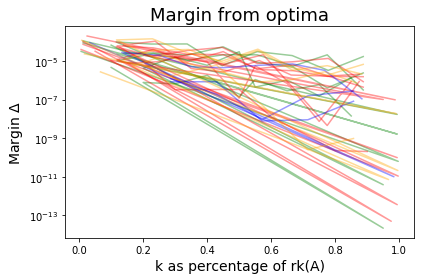

In [7]:
import random as rnd
rnd.seed(12)

plt.yscale('log')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        matrixN = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputN'].iloc[0]
        
        matrixMin = min(matrixM, matrixN)
        isFull = (matrixMin == origRank)
        isSquare = matrixM == matrixN
        
        if isFull:
            if isSquare:
                clr = 'red'
            else:
                clr = 'green'
        else:
            if isSquare:
                clr = 'orange'
            else:
                clr = 'blue'
            
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Delta_diff']
        
        
        if (rnd.random() < 0.20): 
            plt.plot(xax, yax, color=clr, alpha=0.4)
            
            
plt.title("Margin from optima", fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Margin $\Delta$', fontsize=14)
plt.tight_layout()
plt.savefig('confronto_forma_singular.png', format='png', dpi=300)
plt.show()

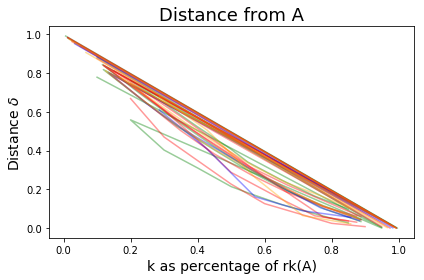

In [8]:
import random as rnd
rnd.seed(12)

plt.yscale('linear')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        matrixN = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputN'].iloc[0]
        
        matrixMin = min(matrixM, matrixN)
        isFull = (matrixMin == origRank)
        isSquare = matrixM == matrixN
        
        if isFull:
            if isSquare:
                clr = 'red'
            else:
                clr = 'green'
        else:
            if isSquare:
                clr = 'orange'
            else:
                clr = 'blue'
            
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Our_delta']
        
        
        if (rnd.random() < 0.15): #20, 15 for other plot
            plt.plot(xax, yax, color=clr, alpha=0.4)
            
            
plt.title("Distance from A", fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Distance $\delta$', fontsize=14)

plt.tight_layout()
plt.savefig('confronto_andamento_lineare.png', format='png', dpi=300)
plt.show()

In [41]:
dfSum.sort_values(by='ConvenientIters', ascending=False).head(40)


,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters
588,rnd_7_1_1,10,10,10,2,0.668674,0.668683,9.408979e-06,0.000697,0.012166,-0.011468,100,7,1,1,0.000122,0.000576,5.0
255,rnd_19_1_1,10,10,7,2,0.676765,0.676767,1.709507e-06,0.000592,0.006462,-0.005870,52,19,1,1,0.000124,0.000467,4.0
256,rnd_19_1_2,10,10,7,3,0.506002,0.506009,6.362854e-06,0.000592,0.014380,-0.013788,103,19,1,2,0.000140,0.000452,4.0
257,rnd_19_1_3,10,10,7,4,0.261919,0.261919,5.379630e-08,0.000592,0.003537,-0.002945,19,19,1,3,0.000186,0.000405,3.0
591,rnd_7_1_4,10,10,10,6,0.127019,0.127019,1.315772e-08,0.000697,0.002706,-0.002009,12,7,1,4,0.000226,0.000472,3.0
590,rnd_7_1_3,10,10,10,5,0.227800,0.227800,3.436081e-07,0.000697,0.004460,-0.003762,24,7,1,3,0.000186,0.000512,3.0
589,rnd_7_1_2,10,10,10,3,0.470363,0.470363,3.308200e-07,0.000697,0.003981,-0.003284,20,7,1,2,0.000199,0.000498,3.0
258,rnd_19_1_4,10,10,7,5,0.065040,0.065040,2.552623e-10,0.000592,0.002072,-0.001480,10,19,1,4,0.000207,0.000384,2.0
259,rnd_19_1_5,10,10,7,6,0.022740,0.022740,9.783453e-10,0.000592,0.002456,-0.001864,11,19,1,5,0.000223,0.000368,2.0
60,rnd_12_1_1,320,320,320,2,0.991473,0.991568,9.497537e-05,0.021081,0.575663,-0.554582,81,12,1,1,0.007107,0.013974,2.0


Sample plot for one error trend

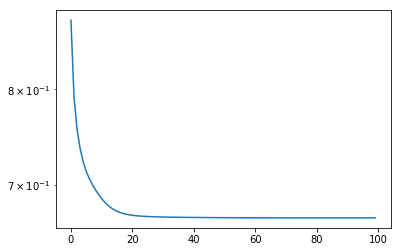

In [44]:
dfTemp = dfLogs['rnd_7_1_1']

plt.yscale('log')
plt.plot(dfTemp['Error'])
plt.show()

Comparison plot for the error trends varying the value of k

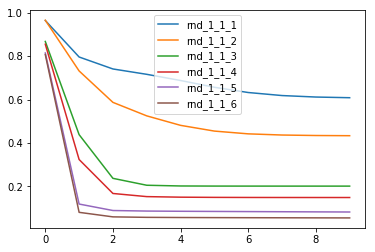

In [47]:
batch = '1'
batchidx = '1'

isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)

for tsk in filter(isTask, TaskNames):
    dfTemp = dfLogs[tsk]
    plt.plot(dfTemp['Error'][:10], label=tsk)
    
plt.legend(loc="best")
plt.show()

Comparison plot of the error distance w.r.t the optimum

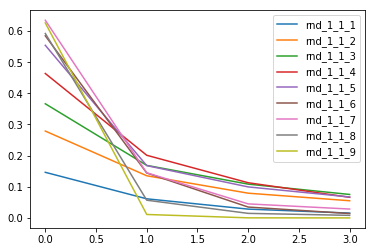

In [14]:
batch = '1'
batchidx = '1'

isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)

for tsk in filter(isTask, TaskNames):
    dfTemp = dfLogs[tsk]
    optimal_delta = float(dfSum[dfSum.InputName==tsk]['Opt_delta'])
    plt.plot((dfTemp['Error']-optimal_delta)[:4], label=tsk)
    
plt.legend(loc="best")
plt.show()

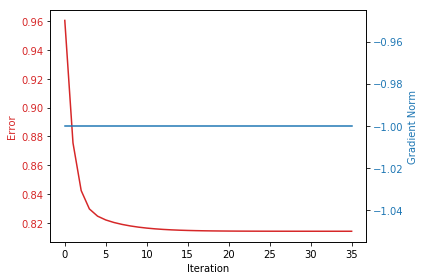

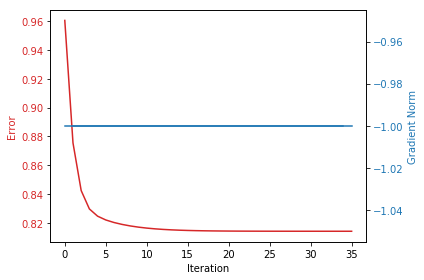

In [10]:
dfTemp = dfLogs['rnd_1_1_1']

upto = 50

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Error', color=color)
ax1.plot(dfTemp['Error'][:upto], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color)  
ax2.plot(dfTemp['GradientNorm'][:upto], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Plot the two subsequences for the gradient separated
gn = dfTemp['GradientNorm']
eveIdx = list(range(0, len(gn), 2))
oddIdx = list(range(1, len(gn), 2))

evegn = [gn[i] for i in eveIdx]
oddgn = [gn[i] for i in oddIdx]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Error', color=color)
ax1.plot(dfTemp['Error'][:upto], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color)  
ax2.plot(eveIdx[:upto], evegn[:upto], color=color)
ax2.plot(oddIdx[:upto], oddgn[:upto], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [ ]:
plt.plot(dfTemp['ErrorRatio'][:50])

In [ ]:
dfTemp['ErrorRatio']